In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

print(torch.cuda.is_available())

In [ ]:
device = torch.device('cuda')

In [ ]:
input_size = 784
hidden_size = 100
num_classes = 10
num_epoches = 2
batch_size = 100
learning_rate = 0.001

torch.Size([100, 1, 28, 28]) torch.Size([100])


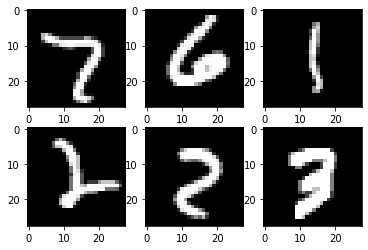

In [ ]:
train_data = torchvision.datasets.MNIST(train=True, root='./data', download=True, transform=transforms.ToTensor())
test_data = torchvision.datasets.MNIST(train=False, root='./data', download=True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape )

for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(samples[i][0],cmap='gray')
plt.show()

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return(out)


model = NeuralNet(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


n_total_steps = len(train_loader)
for epoch in range(num_epoches):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if((i+1) % 100 == 0):
      print(f'epoch {epoch+1}/{num_epoches}, step {i+1}/{n_total_steps}, loss = {loss.item(): .4f}')

with torch.no_grad():
  n_correct = 0
  n_sample = 0

  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predictions = torch.max(outputs, axis=1)

    n_sample += labels.shape[0]
    n_correct += (predictions == labels).sum().item()
  
  acc = 100.0 * n_correct / n_sample
  print(f'accuracy = {acc}')

epoch 1/2, step 100/600, loss =  0.4432
epoch 1/2, step 200/600, loss =  0.4059
epoch 1/2, step 300/600, loss =  0.3900
epoch 1/2, step 400/600, loss =  0.2694
epoch 1/2, step 500/600, loss =  0.2069
epoch 1/2, step 600/600, loss =  0.2068
epoch 2/2, step 100/600, loss =  0.2177
epoch 2/2, step 200/600, loss =  0.2925
epoch 2/2, step 300/600, loss =  0.1406
epoch 2/2, step 400/600, loss =  0.1941
epoch 2/2, step 500/600, loss =  0.2269
epoch 2/2, step 600/600, loss =  0.1492
accuracy = 95.32
